# Using analagous interface to qutips mesolve

In [11]:
import qutip as q
from spylind import spylind as spl
import sympy as sm
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
spl.__file__ile__

'/home/morgan/sd_base/home_dir/git/spylind/spylind/__init__.py'

# Qubit dynamics

## Single qubit

### Qutip version

In [26]:
#def qubit_integrate(epsilon, delta, g1, g2, solver):
epsilon = 0.0 * 2 * np.pi   # cavity frequency
delta   = 1.0 * 2 * np.pi   # atom frequency
g2 = 0.15
g1 = 0.0

# intial state
psi0 = q.basis(2,0)
H = epsilon / 2.0 * q.sigmaz() + delta / 2.0 * q.sigmax()
# collapse operators
c_ops = []
if g1 > 0.0:
    c_ops.append(np.sqrt(g1) * q.sigmam())
if g2 > 0.0:
    c_ops.append(np.sqrt(g2) * q.sigmaz())

e_ops = [q.sigmax(), q.sigmay(), q.sigmaz()]
tlist = np.linspace(0,2,100)
output = q.mesolve(H, psi0, tlist, c_ops, e_ops) 

No pretty printing stuff (probably because no Pandas)


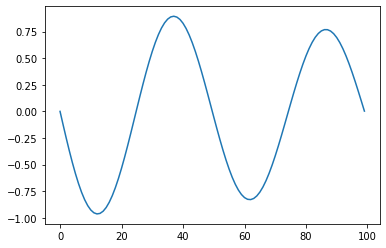

In [27]:
plt.plot(output.expect[1])

In [28]:

#output = spl.mesolve([(sm.symbols('H_0'),H) ], psi0, tlist, c_ops, e_ops) 
output = spl.mesolve([H] , psi0, tlist=tlist, c_ops = c_ops, e_ops=e_ops ) 

makeMESymb enter
Munch({'tSym': t, 'dimSyms': [], 'prop_state_syms': [\rho_{0|0}, \rho_{1|1}, \rho_{0|1}], 'stationary_state_syms': [], 'driving_syms': [], 'state_dep_syms': []})
state dependent functions should have signature [t, \rho_{0|0}, \rho_{1|1}, \rho_{0|1}]


TypeError: object of type 'Qobj' has no len()

### Inhomogeneously broadened ensemble of qubits

In [30]:
psi0.data.todense()

matrix([[1.+0.j],
        [0.+0.j]])